In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/HIGH COMP/Downloads/f_74fc2805-aff9-4596-abb6-b1d95e7f4494/تمرین2/used_cars.csv')
df.head(5)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
#Show shape
df.shape

(8128, 13)

In [4]:
#Show columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
#Show dtypes
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [6]:
#Show nunique
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [7]:
#Show Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
#Show Describe
df.describe().T

count           mean            std      min       25%  \
year           8128.0    2013.804011       4.044249   1983.0    2011.0   
selling_price  8128.0  638271.807702  806253.403508  29999.0  254999.0   
km_driven      8128.0   69819.510827   56550.554958      1.0   35000.0   
seats          7907.0       5.416719       0.959588      2.0       5.0   

                    50%       75%         max  
year             2015.0    2017.0      2020.0  
selling_price  450000.0  675000.0  10000000.0  
km_driven       60000.0   98000.0   2360457.0  
seats               5.0       5.0        14.0

In [9]:
#Show NULL
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
#Show the vlaue counts
columns =['fuel','seller_type','transmission','owner']
for col in columns:
    print(f"{col} Value counts: ")
    print(df[col].value_counts)

fuel Value counts: 
<bound method IndexOpsMixin.value_counts of 0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8128, dtype: object>
seller_type Value counts: 
<bound method IndexOpsMixin.value_counts of 0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
8123    Individual
8124    Individual
8125    Individual
8126    Individual
8127    Individual
Name: seller_type, Length: 8128, dtype: object>
transmission Value counts: 
<bound method IndexOpsMixin.value_counts of 0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
8123    Manual
8124    Manual
8125    Manual
8126    Manual
8127    Manual
Name: transmission, Length: 8128, dtype: object>
owner Value counts: 
<bound method IndexOpsMixin.value_counts of 0                First Owner
1               Second

In [11]:
df.describe().T

count           mean            std      min       25%  \
year           8128.0    2013.804011       4.044249   1983.0    2011.0   
selling_price  8128.0  638271.807702  806253.403508  29999.0  254999.0   
km_driven      8128.0   69819.510827   56550.554958      1.0   35000.0   
seats          7907.0       5.416719       0.959588      2.0       5.0   

                    50%       75%         max  
year             2015.0    2017.0      2020.0  
selling_price  450000.0  675000.0  10000000.0  
km_driven       60000.0   98000.0   2360457.0  
seats               5.0       5.0        14.0

# Data Cleaning

In [12]:
df = df[(df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')]
df.reset_index(drop=True, inplace=True)


In [13]:
df['mileage'] = df['mileage'].str.replace('kmpl','')
df.rename(columns={'mileage' : 'mileage_kmpl'},inplace=True)

In [14]:
df['mileage_kmpl'] = pd.to_numeric(df['mileage_kmpl'], errors='coerce')
df['mileage_kmpl'] = df['mileage_kmpl'].astype(int, errors='ignore')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage_kmpl   7819 non-null   float64
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 816.0+ KB


In [16]:
df['engine'] = df['engine'].str.replace('CC','')
df['engine'] = df['engine'].astype(int,errors='ignore')

df.rename(columns={'engine': 'engine_CC'}, inplace=True)

In [17]:
df['engine_CC'] = df['engine_CC'].astype(float,errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage_kmpl   7819 non-null   float64
 9   engine_CC      7819 non-null   float64
 10  max_power      7825 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 816.0+ KB


In [18]:
df['max_power'] = df['max_power'].str.replace('bhp','')
df['max_power'] = df['max_power'].astype(float,errors='ignore')

df.rename(columns={'max_power':'max_power_BHP'},inplace=True)


In [19]:
df['torque_Nm'] = df['torque'].str.extract(r'(\d+)Nm')

df['torque_rpm'] = df['torque'].str.extract(r'(\d+)rpm')

In [20]:
df['torque_rpm'] = df['torque_rpm'].astype(float,errors='ignore')


In [21]:
df['torque_Nm'] = df['torque_Nm'].astype(float,errors='ignore')

In [22]:
df.drop('torque',axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage_kmpl   7819 non-null   float64
 9   engine_CC      7819 non-null   float64
 10  max_power_BHP  7825 non-null   float64
 11  seats          7819 non-null   float64
 12  torque_Nm      6955 non-null   float64
 13  torque_rpm     7254 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 878.7+ KB


In [24]:
df.head(2)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   

  seller_type transmission         owner  mileage_kmpl  engine_CC  \
0  Individual       Manual   First Owner         23.40     1248.0   
1  Individual       Manual  Second Owner         21.14     1498.0   

   max_power_BHP  seats  torque_Nm  torque_rpm  
0          74.00    5.0      190.0      2000.0  
1         103.52    5.0      250.0      2500.0

In [25]:
df['seats'] = df['seats'].astype('int',errors='ignore')

# Handeling Missing Values

In [26]:
df['mileage_kmpl'].fillna(df['mileage_kmpl'].mean(), inplace=True)
df['engine_CC'].fillna(df['engine_CC'].mean(),inplace=True)
df['max_power_BHP'].fillna(df['max_power_BHP'].mean(),inplace=True)
df['seats'].fillna(df['seats'].mean(),inplace=True)
df['torque_Nm'].fillna(df['torque_Nm'].mean(),inplace=True)
df['torque_rpm'].fillna(df['torque_rpm'].mean(),inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage_kmpl   8033 non-null   float64
 9   engine_CC      8033 non-null   float64
 10  max_power_BHP  8033 non-null   float64
 11  seats          8033 non-null   float64
 12  torque_Nm      8033 non-null   float64
 13  torque_rpm     8033 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 878.7+ KB


# Update the data by scatter figure

In [28]:

fig = px.scatter_matrix(df, dimensions=['year', 'selling_price','km_driven','fuel','transmission',
                                        'owner','mileage_kmpl','engine_CC','max_power_BHP','seats','torque_Nm','torque_rpm'])
fig.update_layout(width=2000, height=1200, showlegend=False, title_text="Pairplot of Car Price Prediction Dataset")
fig.show()

# Exploratory data and feature engineerings

In [29]:
best_cars = df.groupby('name').size().sort_values(ascending=False).reset_index().head(10)
best_cars.rename(columns={0: 'count'},inplace=True)

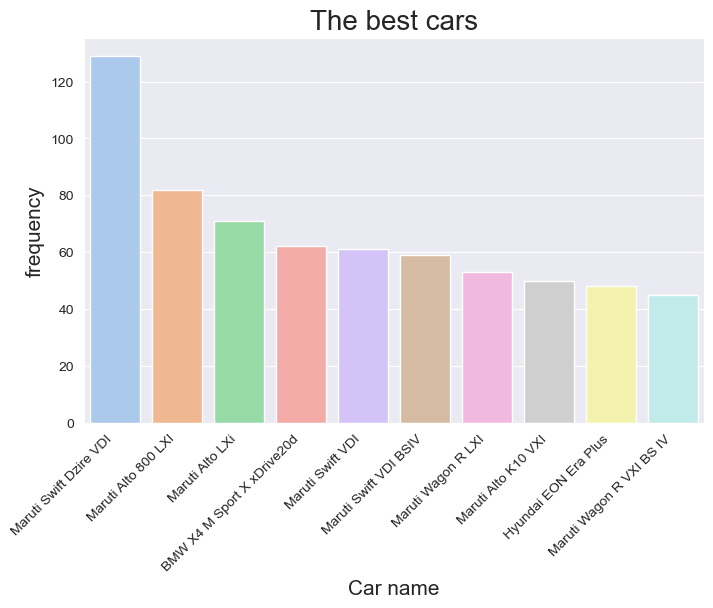

In [30]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.barplot(data=best_cars,x='name',y='count',palette='pastel')
plt.title('The best cars',fontsize=20)
plt.xlabel('Car name',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()


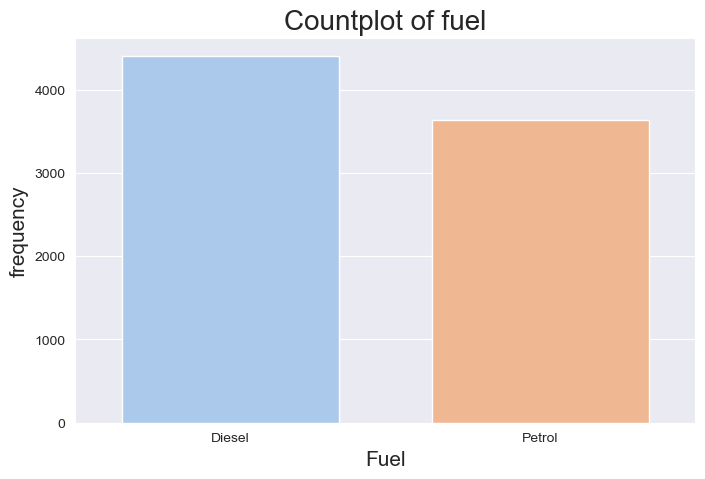

In [31]:
#Show the fuel data by countplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(data=df , x='fuel',palette="pastel",width=0.7)
plt.title("Countplot of fuel",fontsize=20)
plt.xlabel("Fuel",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [32]:
#Show the data on the base of year if machine production
comb_year_name = df.groupby('year')['name'].count().to_frame().reset_index()
comb_year_name.head()

year  name
0  1983     1
1  1994     3
2  1995     2
3  1996     3
4  1997    11

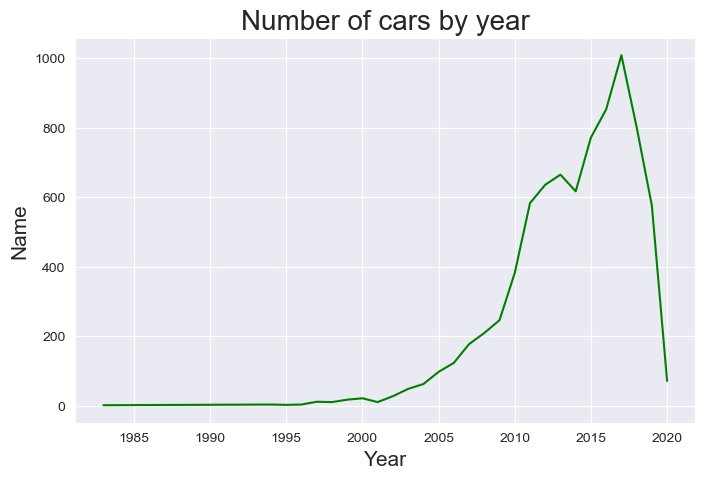

In [33]:
#Show the year and name of cars by lineplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.lineplot(data=comb_year_name,x='year',y='name',color='green')
plt.title("Number of cars by year",fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Name',fontsize=15)
plt.show()

In [35]:
#Change the year of producion to car's age
df['age'] = datetime.today().year - df['year']

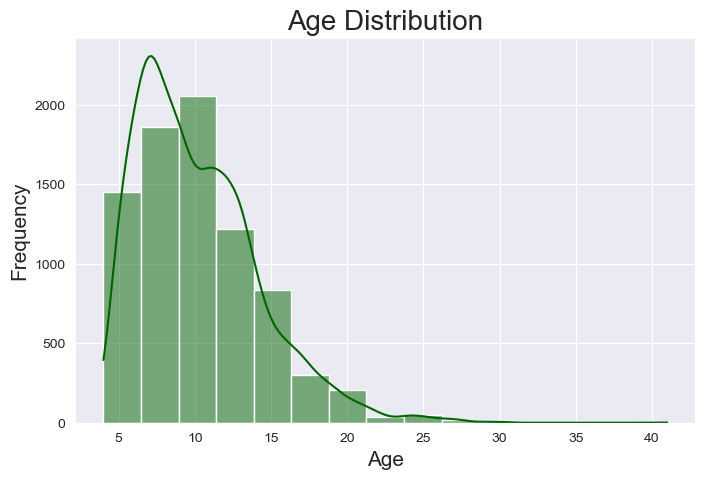

In [36]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='age',color='darkgreen',bins=15,kde=True)
plt.title("Age Distribution",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [37]:
df.drop('year',axis=1,inplace=True)


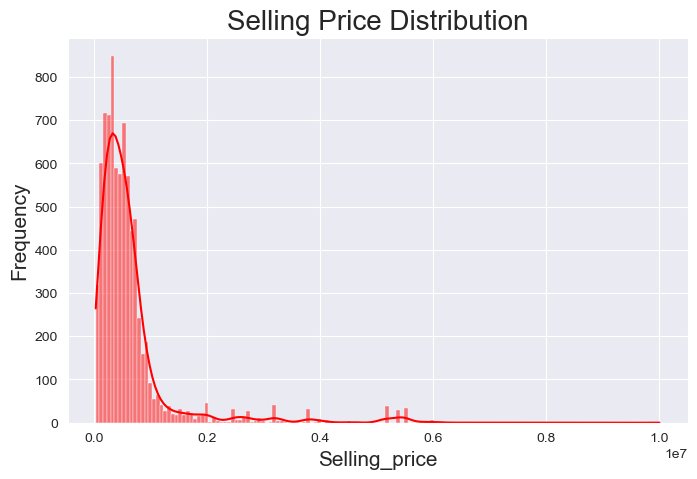

In [38]:
#showing the selling_price data by histplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='selling_price',color='red',bins=150,kde=True)
plt.title("Selling Price Distribution",fontsize=20)
plt.xlabel("Selling_price",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [39]:
#Calculate the Kertosis , Skew and Median of selling_price
skew = df['selling_price'].skew()
kurt = df['selling_price'].kurt()
mean = df['selling_price'].mean()
median = df['selling_price'].median()
ptp = np.ptp(df['selling_price'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :4.1716
Kurosis :20.8417
Mean :642736.1205
Median :450000.0000
PTP :9970001.0000


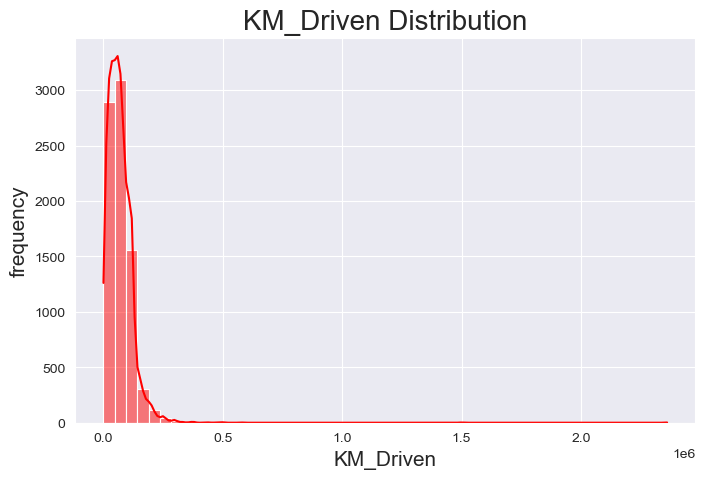

In [40]:
#Show the data km_driven by histplot 
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='km_driven',color='red',bins=50,kde=True)
plt.title("KM_Driven Distribution",fontsize=20)
plt.xlabel("KM_Driven",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()


In [41]:
#Calculate the Kertosis , Skew and Median of km_driven
kurt = df['km_driven'].kurt()
mean = df['km_driven'].mean()
median = df['km_driven'].median()
ptp = np.ptp(df['km_driven'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :11.2355
Kurosis :386.1152
Mean :69738.8182
Median :60000.0000
PTP :2359457.0000


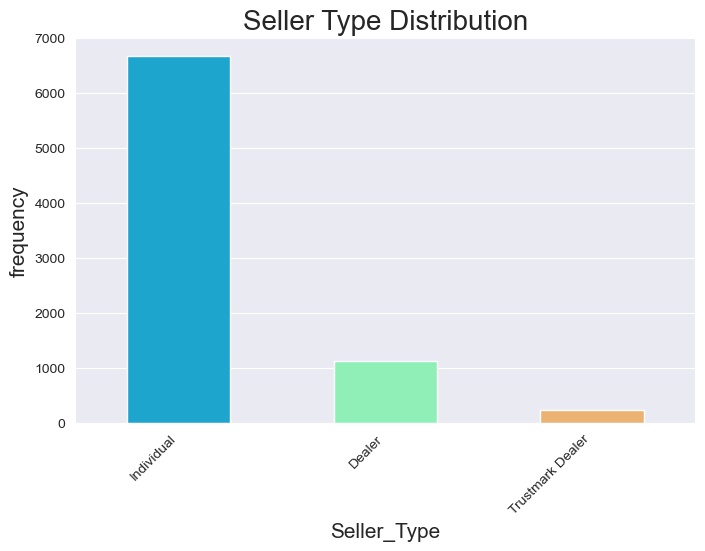

In [42]:
#Show the figure of seller_type by countplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x='seller_type',color='red',width=0.5,palette="rainbow")
plt.title("Seller Type Distribution",fontsize=20)
plt.xlabel("Seller_Type",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

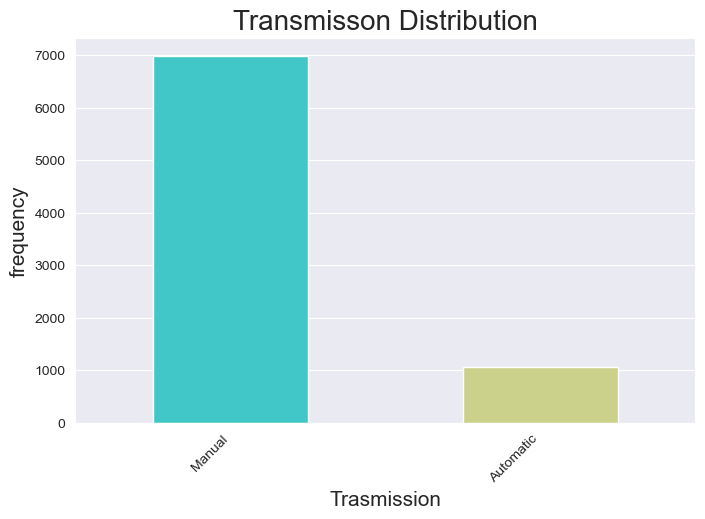

In [43]:
# Show the figure of transmission by countplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x='transmission',color='red',width=0.5,palette="rainbow")
plt.title("Transmisson Distribution",fontsize=20)
plt.xlabel("Trasmission",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

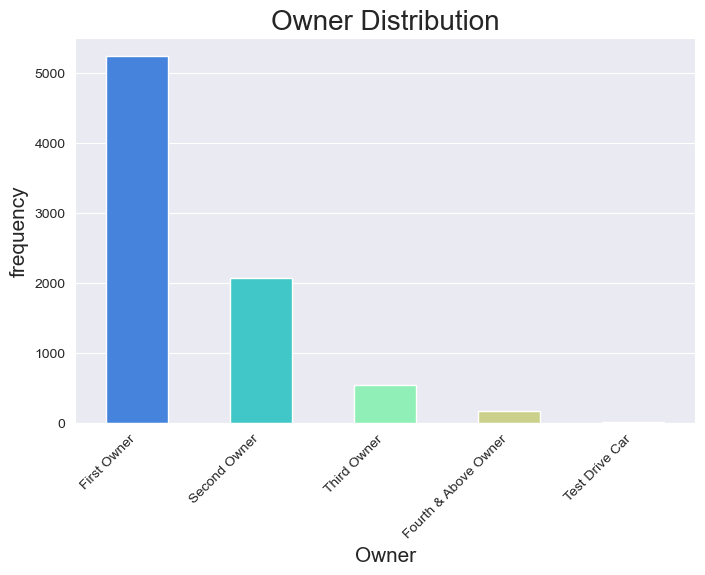

In [44]:
#Show the figurew of owner by countplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x='owner',color='red',width=0.5,palette="rainbow")
plt.title("Owner Distribution",fontsize=20)
plt.xlabel("Owner",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

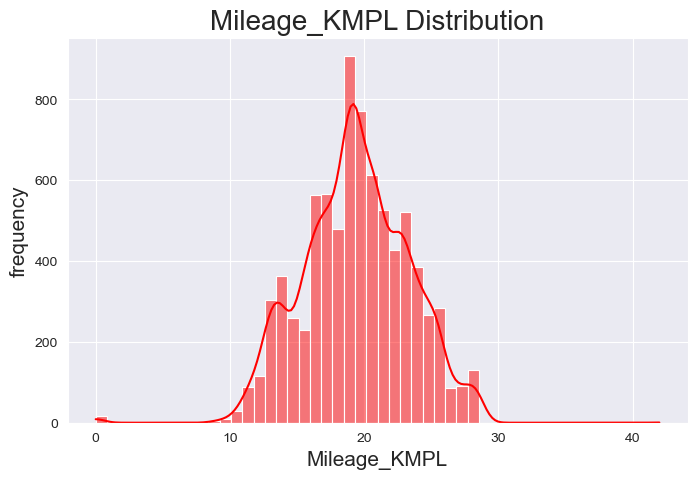

In [45]:
#Show the mileage_kmpl data by histplot 
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='mileage_kmpl',color='red',kde=True,bins=50)
plt.title("Mileage_KMPL Distribution",fontsize=20)
plt.xlabel("Mileage_KMPL",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [46]:
#Calculate the Kertosis , Skew and Median of mileage_kmpl
skew = df['mileage_kmpl'].skew()
kurt = df['mileage_kmpl'].kurt()
mean = df['mileage_kmpl'].mean()
median = df['mileage_kmpl'].median()
ptp = np.ptp(df['mileage_kmpl'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :-0.1748
Kurosis :0.6614
Mean :19.3904
Median :19.3904
PTP :42.0000


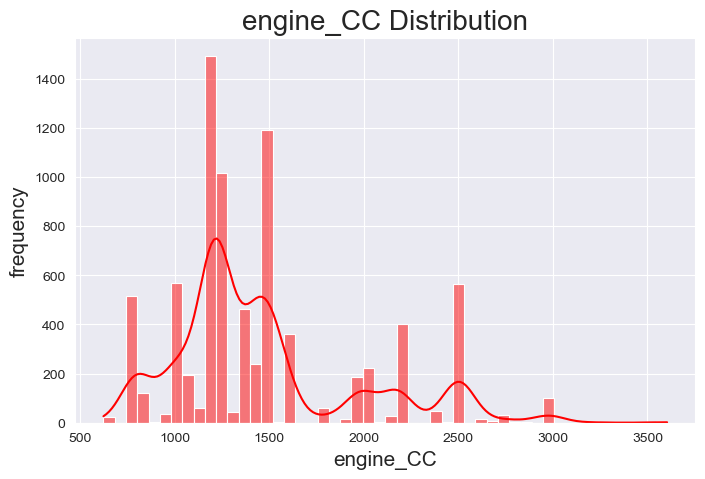

In [47]:
#Show the engine_CC data by histplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='engine_CC',color='red',kde=True,bins=50)
plt.title("engine_CC Distribution",fontsize=20)
plt.xlabel("engine_CC",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [48]:
#Calculate the Kertosis , Skew and Median of engine_CC
skew = df['engine_CC'].skew()
kurt = df['engine_CC'].kurt()
mean = df['engine_CC'].mean()
median = df['engine_CC'].median()
ptp = np.ptp(df['engine_CC'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :1.1399
Kurosis :0.8049
Mean :1463.0907
Median :1248.0000
PTP :2980.0000


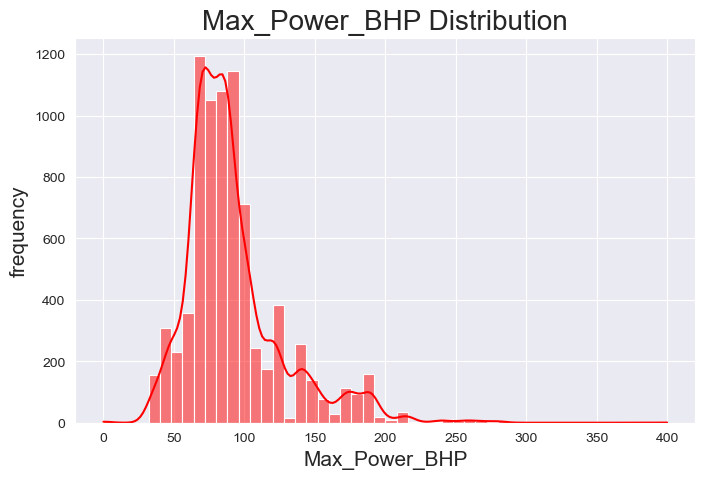

In [49]:
#Show the figure of max_power_BHP by histplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='max_power_BHP',color='red',kde=True,bins=50)
plt.title("Max_Power_BHP Distribution",fontsize=20)
plt.xlabel("Max_Power_BHP",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.show()

In [50]:
#Calculate the Kertosis , Skew and Median of max_power_BHP
skew = df['max_power_BHP'].skew()
kurt = df['max_power_BHP'].kurt()
mean = df['max_power_BHP'].mean()
median = df['max_power_BHP'].median()
ptp = np.ptp(df['max_power_BHP'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :1.6384
Kurosis :3.9464
Mean :91.8647
Median :83.1400
PTP :400.0000


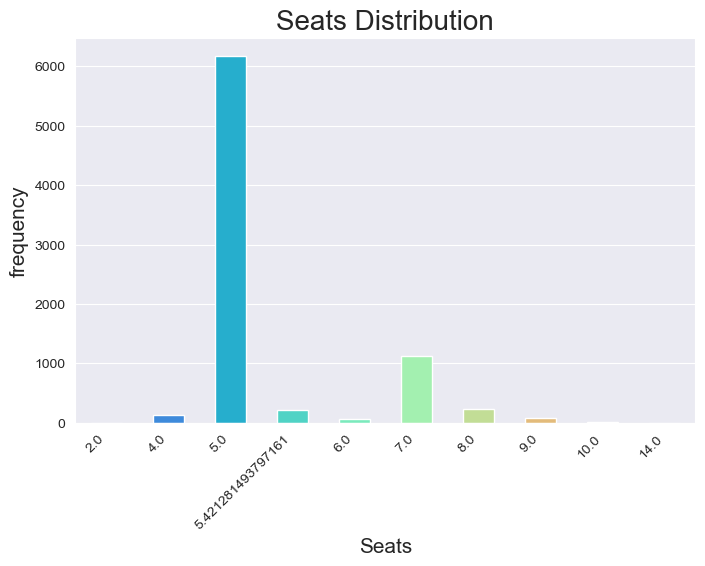

In [51]:
#Show the figure of seats by countplot
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x='seats',color='red',width=0.5,palette="rainbow")
plt.title("Seats Distribution",fontsize=20)
plt.xlabel("Seats",fontsize=15)
plt.ylabel("frequency",fontsize=15)
plt.xticks(rotation=45,ha='right')
plt.show()

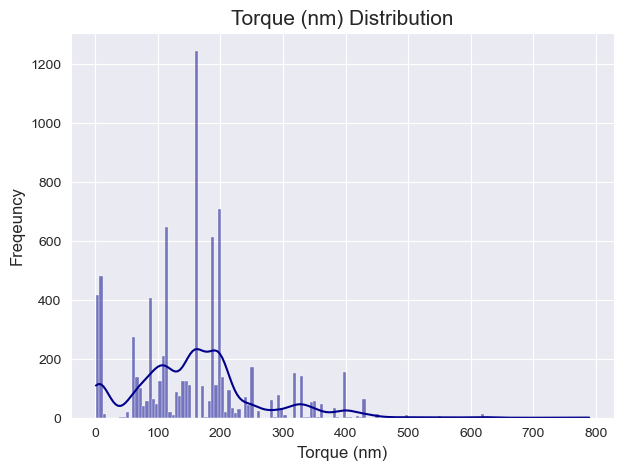

In [52]:
#Show the figure of torque_Nm data by histplot
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='torque_Nm', color='darkblue', bins=150, kde=True)
plt.title("Torque (nm) Distribution", fontsize=15)
plt.xlabel("Torque (nm)", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show()


In [53]:
#Calculate the Kertosis , Skew and Median of torque_Nm
skew = df['torque_Nm'].skew()
kurt = df['torque_Nm'].kurt()
mean = df['torque_Nm'].mean()
median = df['torque_Nm'].median()
ptp = np.ptp(df['torque_Nm'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :0.9185
Kurosis :1.9732
Mean :159.3465
Median :159.3465
PTP :788.0000


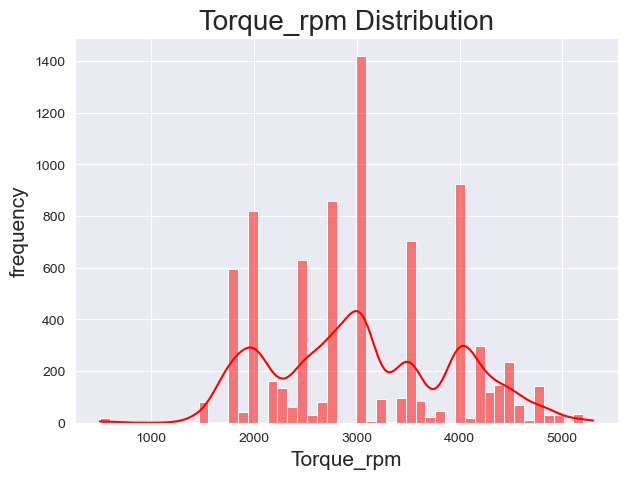

In [55]:
#Show the figure of torque_rpm data by histplot
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
sns.histplot(data=df,x='torque_rpm',color='red',bins=50,kde=True)
plt.title("Torque_rpm Distribution",fontsize=20)
plt.xlabel("Torque_rpm",fontsize=15)
plt.ylabel("frequency",fontsize=15)

plt.show()

In [56]:
#Calculate the Kertosis , Skew and Median of torque_rpm
skew = df['torque_rpm'].skew()
kurt = df['torque_rpm'].kurt()
mean = df['torque_rpm'].mean()
median = df['torque_rpm'].median()
ptp = np.ptp(df['torque_rpm'])


print(f"Skeweness :{skew :.4f}")
print(f"Kurosis :{kurt :.4f}")
print(f"Mean :{mean :.4f}")
print(f"Median :{median :.4f}")
print(f"PTP :{ptp :.4f}")

Skeweness :0.1556
Kurosis :-0.7772
Mean :3069.2495
Median :3000.0000
PTP :4800.0000


# Making new features for correlation with target columns

In [57]:
df['bhp_engineCC_ratio'] = df['max_power_BHP'] / df['engine_CC']

In [58]:
df['bhp_torque_rpm'] = df['max_power_BHP'] / df['torque_rpm']

In [59]:
df['price_to_mileage'] = df['selling_price'] / df['mileage_kmpl']

In [60]:
df['price_to_km'] = df['selling_price'] / df['km_driven']


In [61]:
df.head(2)

name  selling_price  km_driven    fuel seller_type  \
0        Maruti Swift Dzire VDI         450000     145500  Diesel  Individual   
1  Skoda Rapid 1.5 TDI Ambition         370000     120000  Diesel  Individual   

  transmission         owner  mileage_kmpl  engine_CC  max_power_BHP  seats  \
0       Manual   First Owner         23.40     1248.0          74.00    5.0   
1       Manual  Second Owner         21.14     1498.0         103.52    5.0   

   torque_Nm  torque_rpm  age  bhp_engineCC_ratio  bhp_torque_rpm  \
0      190.0      2000.0   10            0.059295        0.037000   
1      250.0      2500.0   10            0.069105        0.041408   

   price_to_mileage  price_to_km  
0      19230.769231     3.092784  
1      17502.365184     3.083333

# Data Encoding

In [65]:
df = pd.get_dummies(df,columns=['fuel','seller_type','transmission'],dtype='int')
df.head(1)

KeyError: "None of [Index(['fuel', 'seller_type', 'transmission'], dtype='object')] are in the [columns]"

In [66]:
df['owner'] = df['owner'].map({
    'Fist Owner':5,
    'Second Owner':4,
    'Third Owner':3,
    'Fourth and Above owner':2,
    'Test Drive car':1
})

In [69]:
# df['price_to_owner_ratio'] =(df['selling_price'] / (df['owner'] + 1)).astype(int)

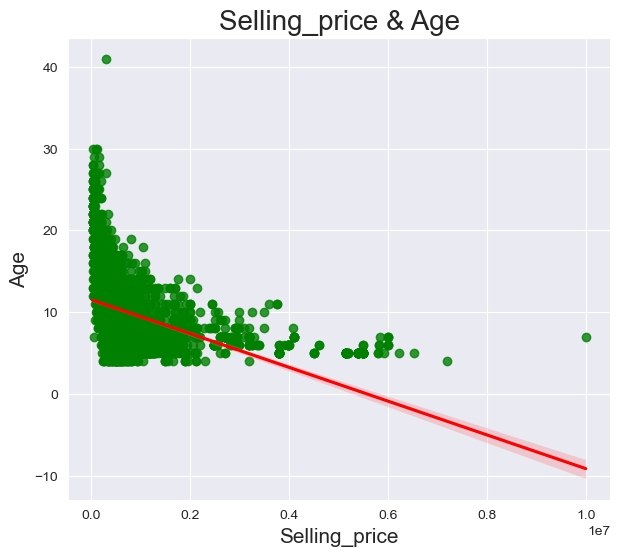

In [72]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='age',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Age',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

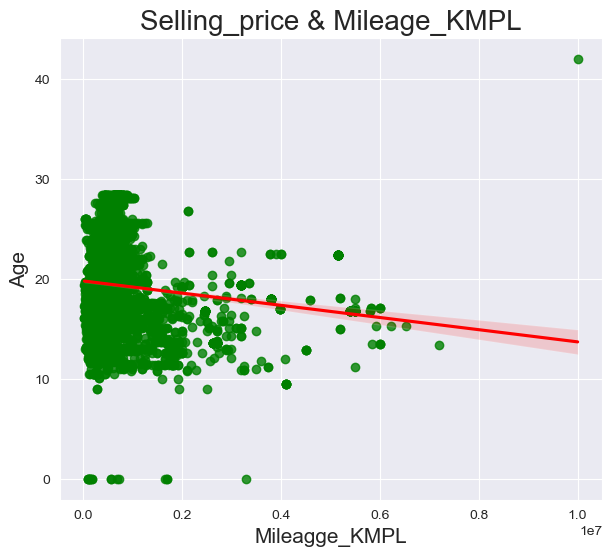

In [74]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='mileage_kmpl',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Mileage_KMPL',fontsize=20)
plt.xlabel('Mileagge_KMPL',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

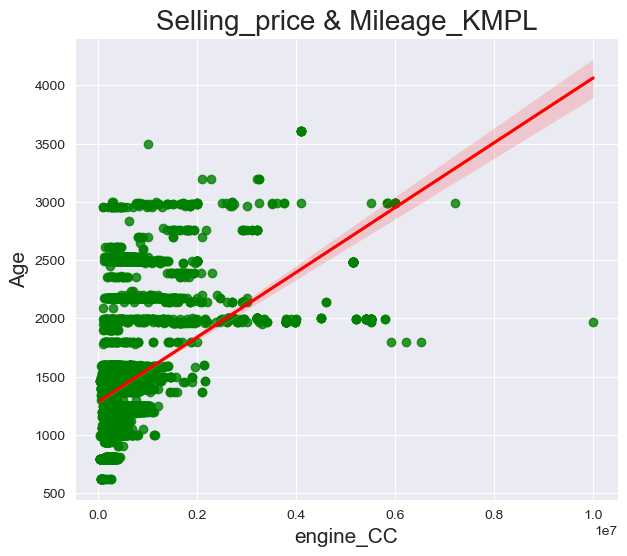

In [75]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='engine_CC',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Mileage_KMPL',fontsize=20)
plt.xlabel('engine_CC',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

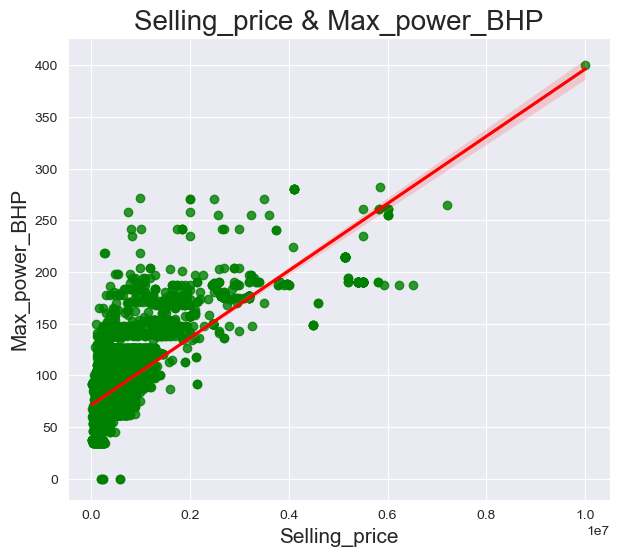

In [78]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='max_power_BHP',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Max_power_BHP',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('Max_power_BHP',fontsize=15)
plt.show()

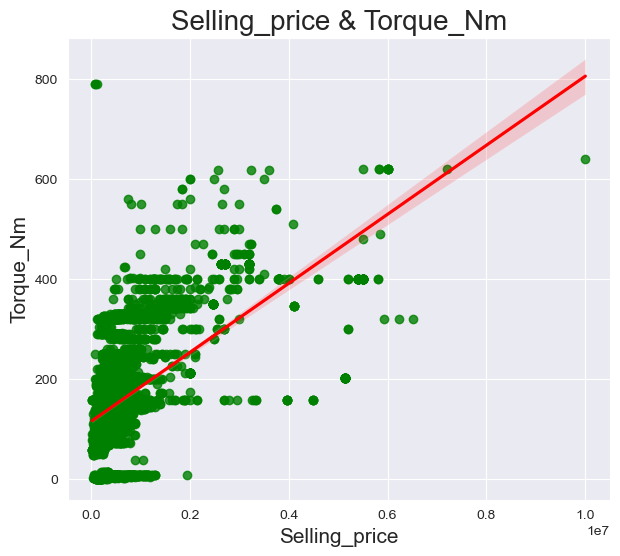

In [80]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='torque_Nm',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Torque_Nm',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('Torque_Nm',fontsize=15)
plt.show()

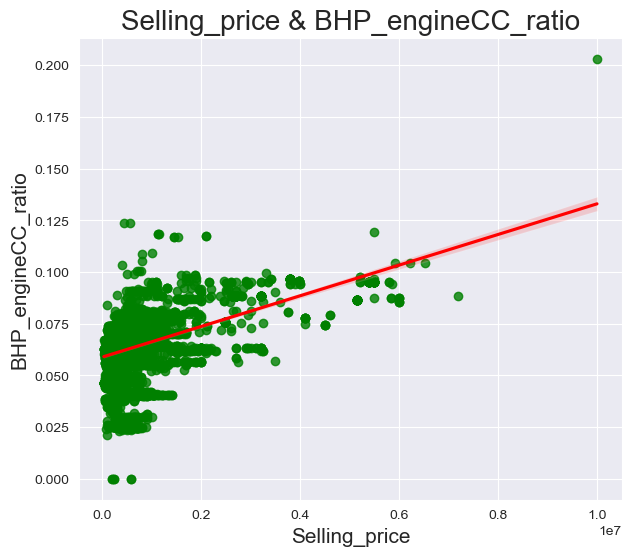

In [82]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='bhp_engineCC_ratio',line_kws={'color':'red'},color='green')
plt.title('Selling_price & BHP_engineCC_ratio',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('BHP_engineCC_ratio',fontsize=15)
plt.show()

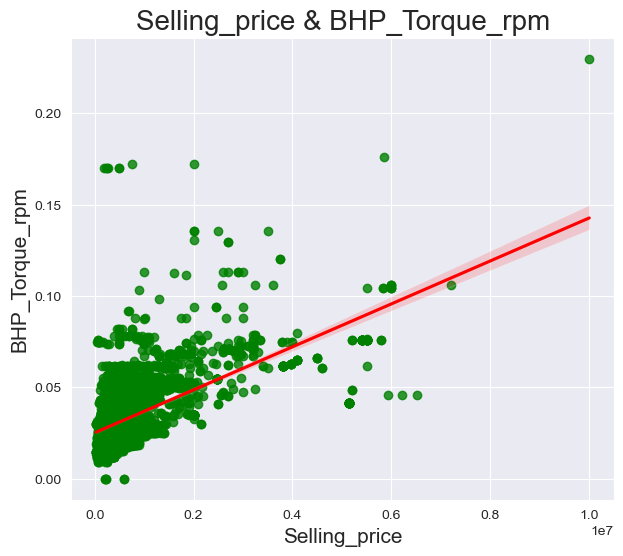

In [83]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='bhp_torque_rpm',line_kws={'color':'red'},color='green')
plt.title('Selling_price & BHP_Torque_rpm',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('BHP_Torque_rpm',fontsize=15)
plt.show()

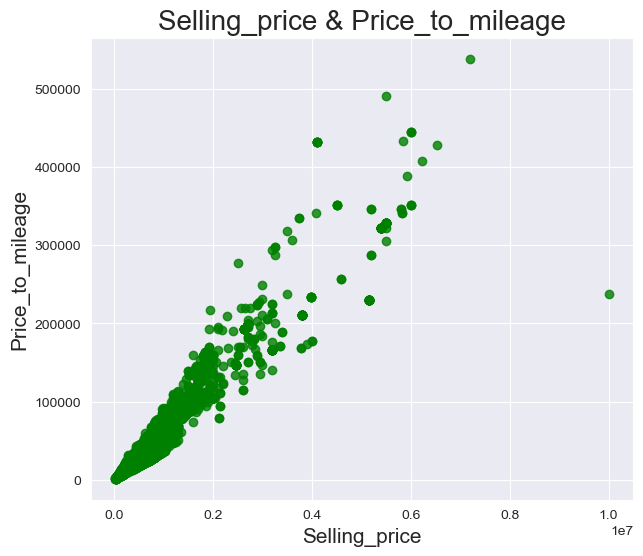

In [84]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='price_to_mileage',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Price_to_mileage',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('Price_to_mileage',fontsize=15)
plt.show()

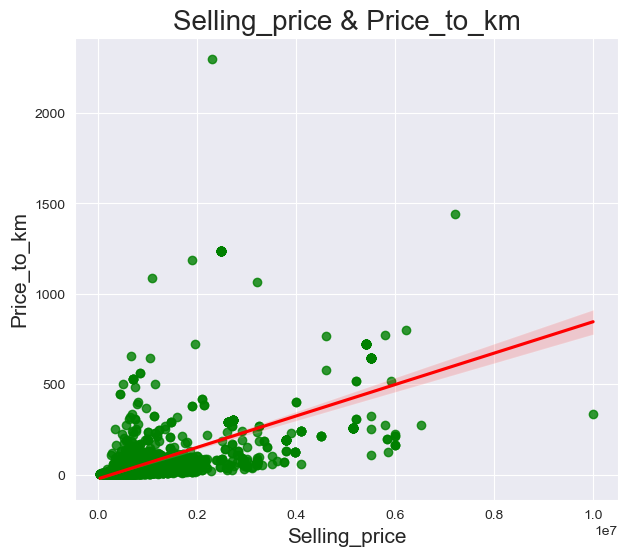

In [85]:
plt.figure(figsize=(7,6))
sns.set_style('darkgrid')
sns.regplot(data=df,x='selling_price',y='price_to_km',line_kws={'color':'red'},color='green')
plt.title('Selling_price & Price_to_km',fontsize=20)
plt.xlabel('Selling_price',fontsize=15)
plt.ylabel('Price_to_km',fontsize=15)
plt.show()

In [87]:
def remove_outliers(df,column_name):
    Q1 = np.quantile(df[column_name],0.25)
    Q3 = np.quantile(df[column_name],0.757)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    highr_bound = Q3 - 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= highr_bound)]
    return df

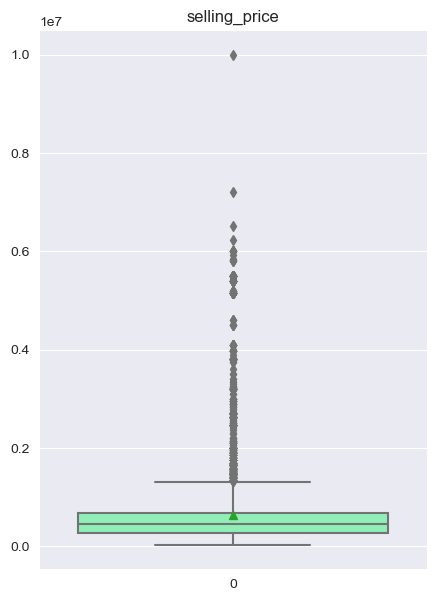

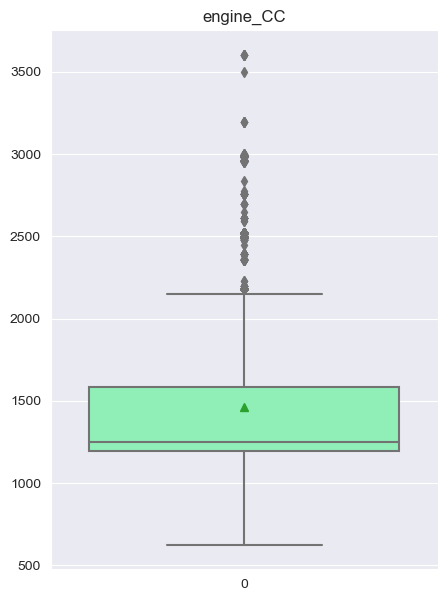

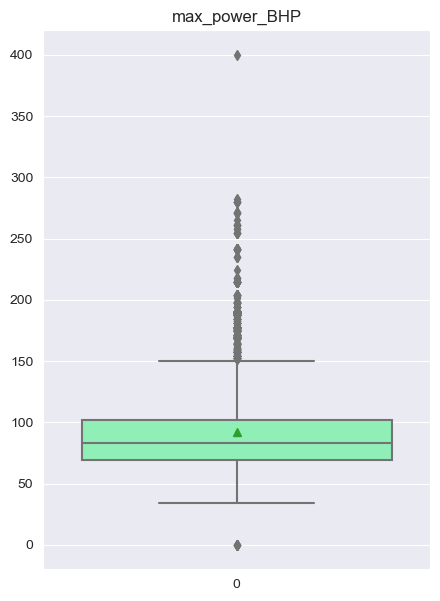

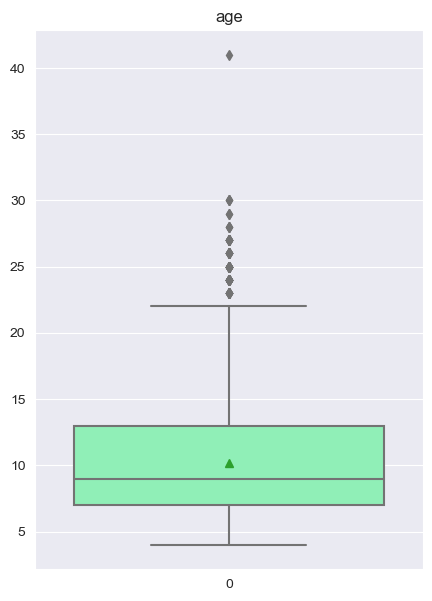

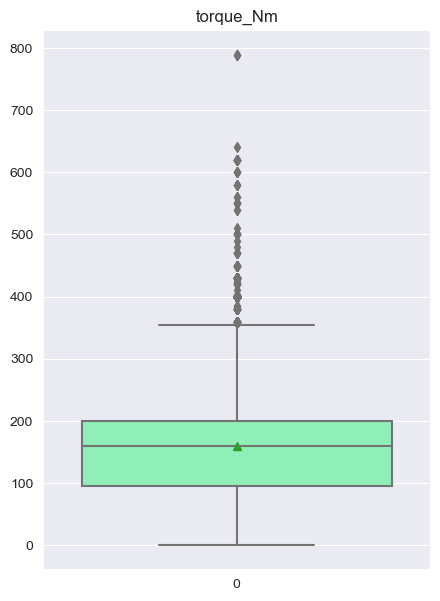

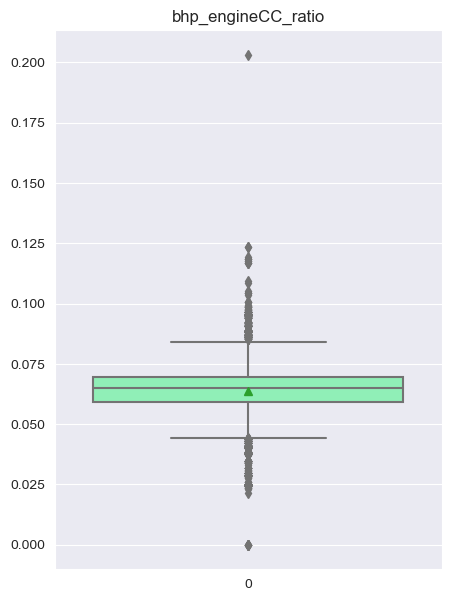

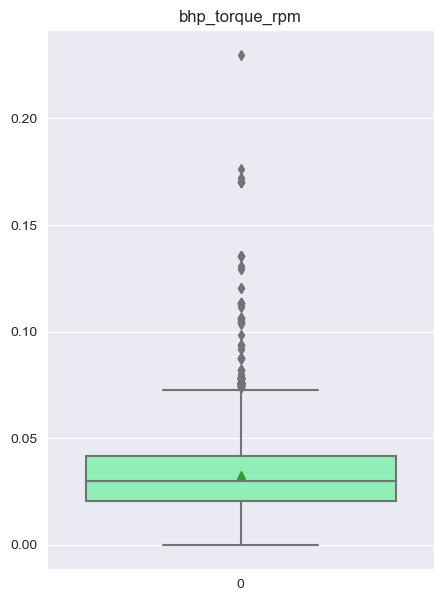

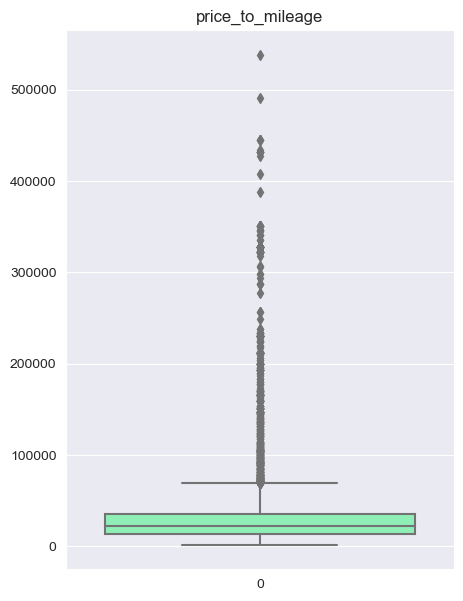

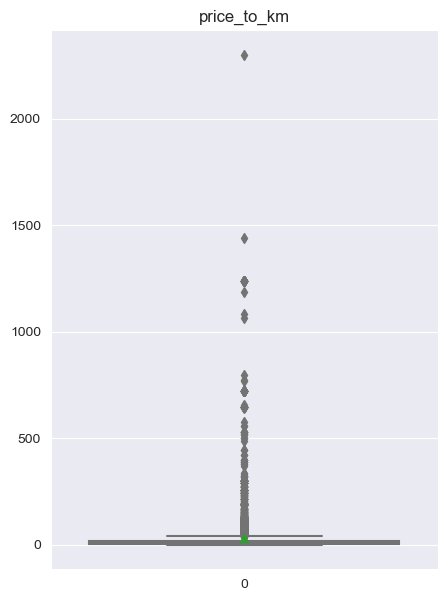

In [92]:
columns = ['selling_price','engine_CC','max_power_BHP','age','torque_Nm',
           'bhp_engineCC_ratio','bhp_torque_rpm','price_to_mileage','price_to_km']
for col in columns:
    plt.figure(figsize=(5,7))
    sns.boxplot(df[col],showmeans=True,palette='rainbow')
    plt.title(f"{col}")
    plt.show()

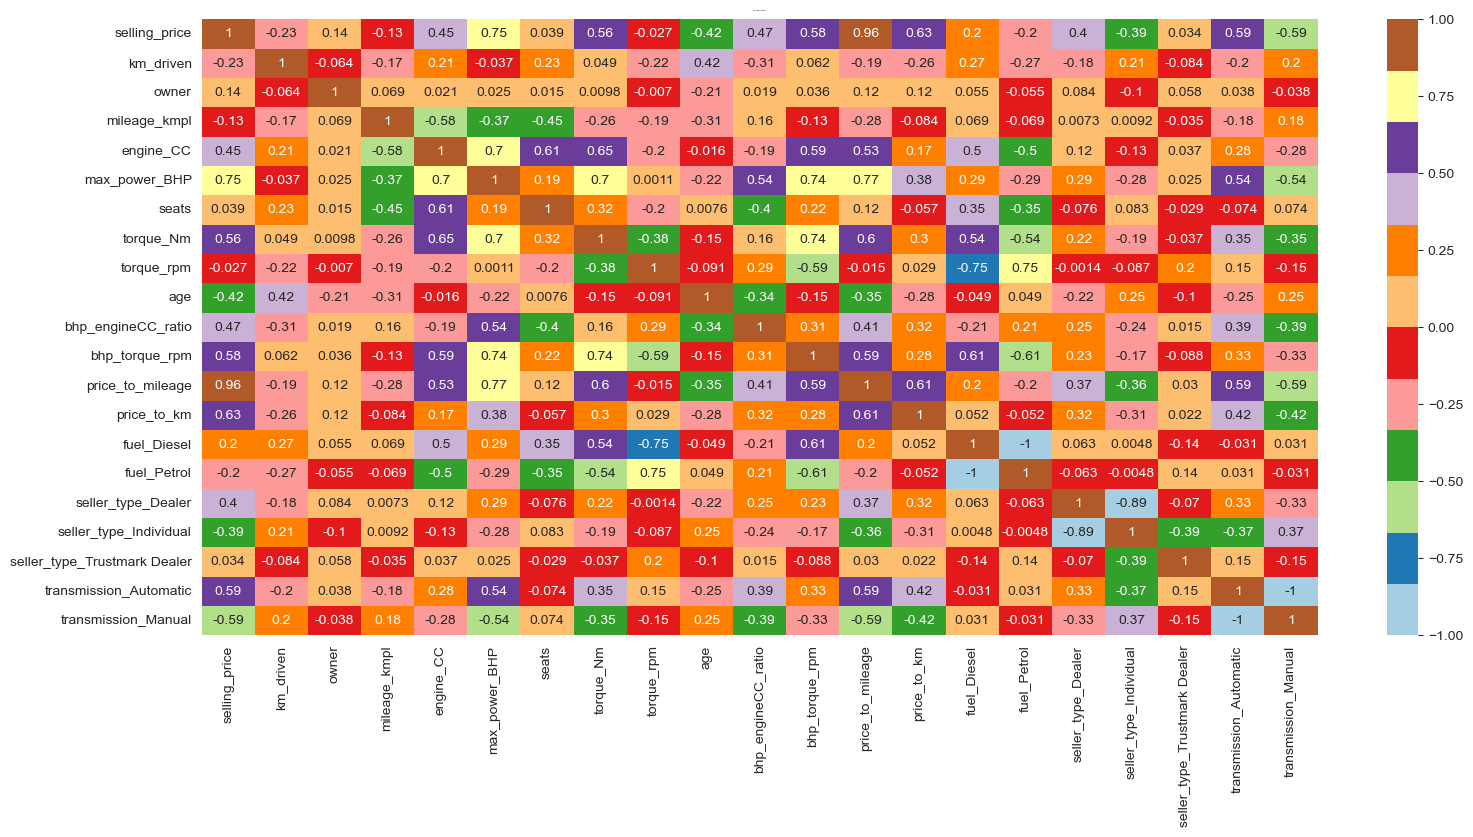

In [95]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(18,8))
sns.heatmap(data=df_corr,cmap='Paired',annot=True)
plt.title("Correlation Heatmap",fontsize=True)
plt.show()

In [100]:
df.head(1)

name  selling_price  km_driven  owner  mileage_kmpl  \
0  Maruti Swift Dzire VDI         450000     145500    NaN          23.4   

   engine_CC  max_power_BHP  seats  torque_Nm  torque_rpm  ...  \
0     1248.0           74.0    5.0      190.0      2000.0  ...   

   bhp_torque_rpm  price_to_mileage  price_to_km  fuel_Diesel  fuel_Petrol  \
0           0.037      19230.769231     3.092784            1            0   

   seller_type_Dealer  seller_type_Individual  seller_type_Trustmark Dealer  \
0                   0                       1                             0   

   transmission_Automatic  transmission_Manual  
0                       0                    1  

[1 rows x 22 columns]

In [106]:
standard_df = df[['selling_price','engine_CC','max_power_BHP','torque_Nm','age',
                  'bhp_engineCC_ratio','bhp_torque_rpm','price_to_km','fuel_Diesel','fuel_Petrol',
                  'seller_type_Dealer','seller_type_Individual','transmission_Automatic','transmission_Manual']].copy()

standard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price           8033 non-null   int64  
 1   engine_CC               8033 non-null   float64
 2   max_power_BHP           8033 non-null   float64
 3   torque_Nm               8033 non-null   float64
 4   age                     8033 non-null   int64  
 5   bhp_engineCC_ratio      8033 non-null   float64
 6   bhp_torque_rpm          8033 non-null   float64
 7   price_to_km             8033 non-null   float64
 8   fuel_Diesel             8033 non-null   int32  
 9   fuel_Petrol             8033 non-null   int32  
 10  seller_type_Dealer      8033 non-null   int32  
 11  seller_type_Individual  8033 non-null   int32  
 12  transmission_Automatic  8033 non-null   int32  
 13  transmission_Manual     8033 non-null   int32  
dtypes: float64(6), int32(6), int64(2)
memory

In [107]:
standard_df.head(1)

selling_price  engine_CC  max_power_BHP  torque_Nm  age  \
0         450000     1248.0           74.0      190.0   10   

   bhp_engineCC_ratio  bhp_torque_rpm  price_to_km  fuel_Diesel  fuel_Petrol  \
0            0.059295           0.037     3.092784            1            0   

   seller_type_Dealer  seller_type_Individual  transmission_Automatic  \
0                   0                       1                       0   

   transmission_Manual  
0                    1

In [113]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

columns = ['selling_price','engine_CC','max_power_BHP','torque_Nm','torque_Nm','age',
           'bhp_torque_rpm','price_to_km']
for col in columns:
    standard_df[col] = minmax_scaler.fit_transform(standard_df[[col]])

In [114]:
standard_df.head(1)

selling_price  engine_CC  max_power_BHP  torque_Nm       age  \
0       0.042126   0.209396          0.185   0.239848  0.162162   

   bhp_engineCC_ratio  bhp_torque_rpm  price_to_km  fuel_Diesel  fuel_Petrol  \
0            0.059295         0.16095     0.001265            1            0   

   seller_type_Dealer  seller_type_Individual  transmission_Automatic  \
0                   0                       1                       0   

   transmission_Manual  
0                    1

In [116]:
standard_df.to_csv("used_cars_preocessing.csv",index=False)